# Data Clean and Analysis

In [52]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import sklearn 

# iPython command to format matplotlib plots
%matplotlib inline
from pandas.io.json import json_normalize
import json

# import ploty for visualization
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')
# remove war
import warnings
warnings.filterwarnings('ignore')
# this will allow ploting inside the notebook


# load and clean json file

## load business.file

In [53]:
'''
load_data(filepath) 
Given a filepath to a JSON file, loads in the file and formats the JSON
'''
def load_data(filepath):
    data = []
    
    # Open file and read in line by line
    with open(filepath) as file:
        for line in file:
            # Strip out trailing whitespace at the end of the line
            data.append(json.loads(line.rstrip()))

    return data

data = load_data('yelp.business.json')
business_df = pd.DataFrame.from_dict(data)
business_df.head()



,_id,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,{'$oid': '5a8c8b75d42e9dd69892c4ef'},104 43rd St,"{'BusinessAcceptsCreditCards': True, 'GoodForM...",EJFdWX908N8Yc2XG0Lky8A,"[Cafes, Restaurants]",Pittsburgh,"{'Tuesday': '17:00-21:30', 'Friday': '17:00-21...",0,40.472735,-79.963265,River Moon Cafe,Lawrenceville,15201,5,4.0,PA
1,{'$oid': '5a8c8b75d42e9dd69892c4fa'},4032 Butler St,"{'GoodForMeal': {'dessert': False, 'latenight'...",o1fTwfqN0sDFNpV1CkOPPg,"[Restaurants, Sandwiches, Coffee & Tea, Food]",Pittsburgh,"{'Monday': '7:00-21:00', 'Tuesday': '7:00-21:0...",1,40.469295,-79.961273,Crazy Mocha Coffee,Lawrenceville,15201,16,3.5,PA
2,{'$oid': '5a8c8b75d42e9dd69892c4fc'},5217 Clairton Blvd,"{'GoodForMeal': {'dessert': False, 'latenight'...",-nHkhiuerqmfBG3v2v9O-g,"[Breakfast & Brunch, Bagels, Restaurants, Bake...",Pittsburgh,"{'Monday': '5:30-17:00', 'Tuesday': '5:30-17:0...",1,40.344194,-79.970963,Bruegger's Bagels,,15236,5,2.5,PA
3,{'$oid': '5a8c8b75d42e9dd69892c512'},135 9th St,"{'BusinessParking': {'garage': True, 'street':...",HcEJ2YiSLX_mT3RE0hvKWQ,"[Nightlife, Adult Entertainment, Strip Clubs]",Pittsburgh,"{'Monday': '12:00-2:00', 'Tuesday': '12:00-2:0...",1,40.444236,-79.998325,Blush,Downtown,15222,21,3.0,PA
4,{'$oid': '5a8c8b75d42e9dd69892c51d'},248 Tara Dr,"{'BusinessAcceptsCreditCards': False, 'ByAppoi...",shNBn6mTKxZ124yPC_H02Q,"[Kitchen & Bath, Countertop Installation, Home...",Pittsburgh,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1,40.327956,-79.960479,T.W.Tile,,15236,3,3.5,PA


In [54]:
data2 = load_data('loc.json')
loc_df = pd.DataFrame.from_dict(data2)
loc_df = loc_df[['business_id','coordinate']]
loc_df.head()

,business_id,coordinate
0,-nHkhiuerqmfBG3v2v9O-g,"[40.3441937, -79.970963]"
1,o1fTwfqN0sDFNpV1CkOPPg,"[40.4692949, -79.9612733]"
2,EJFdWX908N8Yc2XG0Lky8A,"[40.472735, -79.9632647]"
3,575BoZY8tDPcfSRcdsUNLw,"[40.4167567, -80.0303278]"
4,J9f-9Prw2YVM-fiZqv2fmQ,"[40.442147, -79.956513]"


In [33]:
# # Create dummy variables for categories
# categories_df = business_df['categories'].str.join(sep=',').str.get_dummies(sep=',')
# # Save the list of categories for future use
# categories = categories_df.columns.values
# # Merge it with our original dataframe
# business_df = pd.merge(business_df, categories_df, left_index = True, right_index = True)

# business_pit_res = business_df[business_df['Restaurants'] == 1]
# business_pit_res.to_json("business_pit_res.json",orient='records',lines = True)

In [34]:
# '''
# load_data(filepath) 
# Given a filepath to a JSON file, loads in the file and formats the JSON
# '''
# def load_data(filepath):
#     data = []
    
#     # Open file and read in line by line
#     with open(filepath) as file:
#         for line in file:
#             # Strip out trailing whitespace at the end of the line
#             data.append(json.loads(line.rstrip()))

#     return data

# # load loc.json
# data2 = load_data('loc.json')
# loc_df = pd.DataFrame.from_dict(data2)
# loc_df = loc_df[['business_id','coordinate']]
# # load business_res_pit.json
# data3 = load_data('business_res_pit.json')
# business_res_pit = pd.DataFrame.from_dict(data3)
# business_pit_res_loc = pd.merge(business_res_pit,loc_df,how='inner',on='business_id')
# business_pit_res_loc.to_json("business_pit_res_loc.json",orient='records',lines = True)

# Cleaning and formatting columns

## cleaning and formatting business_df columns

### Format attributes column

In [55]:
# Format the attributes as a list of dict objects
attributes_dict = [{'attributes': x} for x in business_df['attributes'].values]

In [56]:
# Create a DataFrame with json_normalize
attributes_df = pd.io.json.json_normalize(attributes_dict)
attributes_df.head()

,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,attributes.Ambience.romantic,attributes.Ambience.touristy,...,attributes.RestaurantsCounterService,attributes.RestaurantsDelivery,attributes.RestaurantsGoodForGroups,attributes.RestaurantsPriceRange2,attributes.RestaurantsReservations,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.Smoking,attributes.WheelchairAccessible,attributes.WiFi
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,NaN,2.0,NaN,NaN,NaN,NaN,True,NaN
1,NaN,NaN,NaN,False,False,False,False,False,False,False,...,NaN,False,True,1.0,False,NaN,True,NaN,NaN,free
2,NaN,NaN,NaN,False,False,False,False,False,False,False,...,NaN,False,True,1.0,False,NaN,True,NaN,False,NaN
3,NaN,NaN,full_bar,False,False,True,False,False,False,False,...,NaN,NaN,True,2.0,NaN,NaN,NaN,no,True,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Convert objects to a numeric datatype if possible
attributes_df = attributes_df.convert_objects(convert_numeric=True)
attributes_df.head()

,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,attributes.Ambience.romantic,attributes.Ambience.touristy,...,attributes.RestaurantsCounterService,attributes.RestaurantsDelivery,attributes.RestaurantsGoodForGroups,attributes.RestaurantsPriceRange2,attributes.RestaurantsReservations,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.Smoking,attributes.WheelchairAccessible,attributes.WiFi
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN
1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,1.0,1.0,0.0,NaN,1.0,NaN,NaN,free
2,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,1.0,1.0,0.0,NaN,1.0,NaN,0.0,NaN
3,NaN,NaN,full_bar,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,1.0,2.0,NaN,NaN,NaN,no,1.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
non_numeric_attributes = attributes_df.select_dtypes(include=['object']).columns
numeric_attributes = attributes_df.select_dtypes(exclude=['object']).columns

attributes_df[non_numeric_attributes].head()

,attributes.AgesAllowed,attributes.Alcohol,attributes.BYOBCorkage,attributes.NoiseLevel,attributes.RestaurantsAttire,attributes.Smoking,attributes.WiFi
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,casual,NaN,free
2,NaN,NaN,NaN,NaN,casual,NaN,NaN
3,NaN,full_bar,NaN,very_loud,NaN,no,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN



The easiest way to get non-numerical/categorical data into a more consummable format is to create dummy/indicator variables for them. To do this, we can use a handy-dandy Pandas function get_dummies to help create dummy variables.

In [59]:

# Create dummy variables for non-numeric attributes
dummy_vars = pd.get_dummies(attributes_df[non_numeric_attributes])

# Drop non-numeric attributes from attributes_df
attributes_df = attributes_df.drop(non_numeric_attributes, axis=1)

# Add the dummy variables to attributes_df
attributes_df = pd.merge(attributes_df, dummy_vars, left_index=True, right_index=True)


In [60]:
# Save the list of attributes for future use
attributes = attributes_df.columns.values

In [61]:
# Merge it with our original dataframe
business_df = pd.merge(business_df, attributes_df, left_index = True, right_index = True)

In [62]:
# Drop our original attributes column that is no longer needed
business_df = business_df.drop('attributes', axis=1)

In [63]:
business_df.head()

,_id,address,business_id,categories,city,hours,is_open,latitude,longitude,name,...,attributes.NoiseLevel_very_loud,attributes.RestaurantsAttire_casual,attributes.RestaurantsAttire_dressy,attributes.RestaurantsAttire_formal,attributes.Smoking_no,attributes.Smoking_outdoor,attributes.Smoking_yes,attributes.WiFi_free,attributes.WiFi_no,attributes.WiFi_paid
0,{'$oid': '5a8c8b75d42e9dd69892c4ef'},104 43rd St,EJFdWX908N8Yc2XG0Lky8A,"[Cafes, Restaurants]",Pittsburgh,"{'Tuesday': '17:00-21:30', 'Friday': '17:00-21...",0,40.472735,-79.963265,River Moon Cafe,...,0,0,0,0,0,0,0,0,0,0
1,{'$oid': '5a8c8b75d42e9dd69892c4fa'},4032 Butler St,o1fTwfqN0sDFNpV1CkOPPg,"[Restaurants, Sandwiches, Coffee & Tea, Food]",Pittsburgh,"{'Monday': '7:00-21:00', 'Tuesday': '7:00-21:0...",1,40.469295,-79.961273,Crazy Mocha Coffee,...,0,1,0,0,0,0,0,1,0,0
2,{'$oid': '5a8c8b75d42e9dd69892c4fc'},5217 Clairton Blvd,-nHkhiuerqmfBG3v2v9O-g,"[Breakfast & Brunch, Bagels, Restaurants, Bake...",Pittsburgh,"{'Monday': '5:30-17:00', 'Tuesday': '5:30-17:0...",1,40.344194,-79.970963,Bruegger's Bagels,...,0,1,0,0,0,0,0,0,0,0
3,{'$oid': '5a8c8b75d42e9dd69892c512'},135 9th St,HcEJ2YiSLX_mT3RE0hvKWQ,"[Nightlife, Adult Entertainment, Strip Clubs]",Pittsburgh,"{'Monday': '12:00-2:00', 'Tuesday': '12:00-2:0...",1,40.444236,-79.998325,Blush,...,1,0,0,0,1,0,0,0,0,0
4,{'$oid': '5a8c8b75d42e9dd69892c51d'},248 Tara Dr,shNBn6mTKxZ124yPC_H02Q,"[Kitchen & Bath, Countertop Installation, Home...",Pittsburgh,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1,40.327956,-79.960479,T.W.Tile,...,0,0,0,0,0,0,0,0,0,0


# Create dummy/indicator variables for categories column

In [64]:
# Create dummy variables for categories
categories_df = business_df['categories'].str.join(sep=',').str.get_dummies(sep=',')

In [65]:
# Save the list of categories for future use
categories = categories_df.columns.values

In [66]:
# Merge it with our original dataframe
business_df = pd.merge(business_df, categories_df, left_index = True, right_index = True)

Instead of dropping the categories column, we're going to keep it around, but reformat it as a tuple

In [67]:
business_df['categories'] = business_df['categories'].apply(lambda x: tuple(x))

In [48]:
business_df.head()

,_id,address,business_id,categories,city,hours,is_open,latitude,longitude,name,...,Wine Bars_y,Wine Tasting Room_y,Wine Tours_y,Wineries_y,Women's Clothing_y,Workers Compensation Law_y,Wraps_y,Yelp Events_y,Yoga_y,Zoos_y
0,{'$oid': '5a8c8b75d42e9dd69892c4ef'},104 43rd St,EJFdWX908N8Yc2XG0Lky8A,"(Cafes, Restaurants)",Pittsburgh,"{'Tuesday': '17:00-21:30', 'Friday': '17:00-21...",0,40.472735,-79.963265,River Moon Cafe,...,0,0,0,0,0,0,0,0,0,0
1,{'$oid': '5a8c8b75d42e9dd69892c4fa'},4032 Butler St,o1fTwfqN0sDFNpV1CkOPPg,"(Restaurants, Sandwiches, Coffee & Tea, Food)",Pittsburgh,"{'Monday': '7:00-21:00', 'Tuesday': '7:00-21:0...",1,40.469295,-79.961273,Crazy Mocha Coffee,...,0,0,0,0,0,0,0,0,0,0
2,{'$oid': '5a8c8b75d42e9dd69892c4fc'},5217 Clairton Blvd,-nHkhiuerqmfBG3v2v9O-g,"(Breakfast & Brunch, Bagels, Restaurants, Bake...",Pittsburgh,"{'Monday': '5:30-17:00', 'Tuesday': '5:30-17:0...",1,40.344194,-79.970963,Bruegger's Bagels,...,0,0,0,0,0,0,0,0,0,0
3,{'$oid': '5a8c8b75d42e9dd69892c512'},135 9th St,HcEJ2YiSLX_mT3RE0hvKWQ,"(Nightlife, Adult Entertainment, Strip Clubs)",Pittsburgh,"{'Monday': '12:00-2:00', 'Tuesday': '12:00-2:0...",1,40.444236,-79.998325,Blush,...,0,0,0,0,0,0,0,0,0,0
4,{'$oid': '5a8c8b75d42e9dd69892c51d'},248 Tara Dr,shNBn6mTKxZ124yPC_H02Q,"(Kitchen & Bath, Countertop Installation, Home...",Pittsburgh,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1,40.327956,-79.960479,T.W.Tile,...,0,0,0,0,0,0,0,0,0,0


# Descriptive Statistics

### Looking at relevant attributes

Since we are looking at restaurants for now, we might want to know the attributes that have the most non-null values, and therefore potentially the more important attributes for restaurants.

In [68]:
# Count the number of non-null attributes 
nonnull_attributes_count = business_df[business_df['Restaurants'] == 1][numeric_attributes].notnull().sum()

# Sort the attribute counts
sorted_attributes = nonnull_attributes_count.sort_values(ascending=False)

# Print the top 20
sorted_attributes[:20]

attributes.BusinessAcceptsCreditCards    2093
attributes.RestaurantsPriceRange2        2047
attributes.RestaurantsTakeOut            2005
attributes.RestaurantsGoodForGroups      1978
attributes.GoodForKids                   1972
attributes.RestaurantsDelivery           1964
attributes.RestaurantsReservations       1961
attributes.OutdoorSeating                1916
attributes.BusinessParking.validated     1878
attributes.BusinessParking.garage        1878
attributes.BusinessParking.lot           1878
attributes.BusinessParking.street        1878
attributes.BusinessParking.valet         1878
attributes.GoodForMeal.latenight         1877
attributes.GoodForMeal.dinner            1877
attributes.GoodForMeal.dessert           1877
attributes.GoodForMeal.lunch             1877
attributes.GoodForMeal.brunch            1877
attributes.GoodForMeal.breakfast         1877
attributes.Ambience.casual               1793
dtype: int64

### Top restaurant categories

In [69]:
# Count the number of restaurants are in each category
restaurant_category_counts = business_df[business_df['Restaurants'] == 1][categories].sum()

# Sort the category counts
sorted_categories = restaurant_category_counts.sort_values(ascending=False)

# Print the top 20
sorted_categories[:20]

Restaurants                  2209
Food                          424
Nightlife                     412
Bars                          407
Pizza                         367
American (Traditional)        351
Sandwiches                    331
American (New)                292
Italian                       223
Breakfast & Brunch            178
Fast Food                     172
Burgers                       171
Chinese                       136
Mexican                       122
Cafes                         119
Salad                         110
Coffee & Tea                   97
Event Planning & Services      97
Seafood                        91
Chicken Wings                  87
dtype: int64

In [ ]:
business_id_name = business_df[['business_id','name']]
business_id_name.head()


In [75]:
# Get the categories that are not relevant to restaurants 
non_restaurant_categories = restaurant_category_counts[restaurant_category_counts <= 0].index.values
non_restaurant_categories

array(['& Probates', 'ATV Rentals/Tours', 'Accessories', 'Accountants',
       'Acupuncture', 'Adult', 'Adult Education', 'Adult Entertainment',
       'Advertising', 'Air Duct Cleaning', 'Airlines',
       'Airport Terminals', 'Allergists', 'Amateur Sports Teams',
       'Appliances', 'Appliances & Repair', 'Appraisal Services',
       'Aquarium Services', 'Aquariums', 'Architects',
       'Architectural Tours', 'Art Classes', 'Art Museums', 'Art Schools',
       'Art Supplies', 'Assisted Living Facilities', 'Astrologers',
       'Auction Houses', 'Audiologist', 'Auto Customization',
       'Auto Detailing', 'Auto Glass Services', 'Auto Insurance',
       'Auto Loan Providers', 'Auto Parts & Supplies', 'Auto Repair',
       'Auto Upholstery', 'Awnings', 'Ayurveda', 'Baby Gear & Furniture',
       'Balloon Services', 'Banks & Credit Unions', 'Bar Crawl',
       'Barbers', 'Barre Classes', 'Bartenders', 'Bartending Schools',
       'Baseball Fields', 'Battery Stores', 'Beer Tours',
    

## Visualizing the data

### Ratings Distribution

In [72]:
figsize = (15, 10)
print('Save default figure size and change figure size to', figsize)
default_figsize = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = figsize

Save default figure size and change figure size to (15, 10)


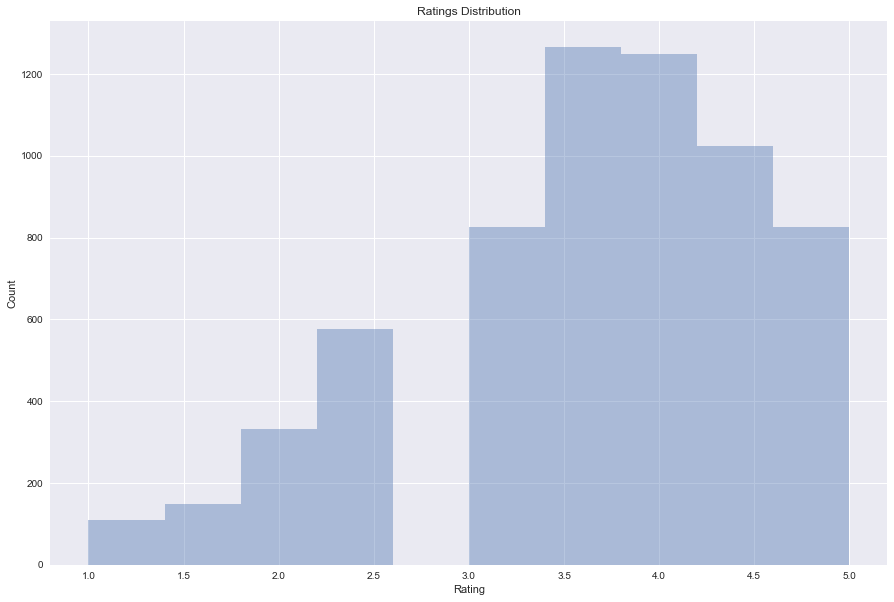

Mean: 3.630090
Min: 1.000000
Max: 5.000000


In [76]:

sns.set(rc={"figure.figsize": (15, 10)})

data = business_df['stars']
sns.distplot(data, kde=False, bins=10)

# Add headers and labels to the plot
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Print some descriptive statistics
print ("Mean: %f" % data.mean())
print ("Min: %f" % data.min() )
print ("Max: %f" % data.max())

In [77]:
res_1_neighborhood = business_df[business_df['Restaurants'] == 1].groupby('neighborhood').count().reset_index()
res_1_neighborhood.describe()

,_id,address,business_id,categories,city,hours,is_open,latitude,longitude,name,...,Wine Bars,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Workers Compensation Law,Wraps,Yelp Events,Yoga,Zoos
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,41.679245,41.679245,41.679245,41.679245,41.679245,41.679245,41.679245,41.679245,41.679245,41.679245,...,41.679245,41.679245,41.679245,41.679245,41.679245,41.679245,41.679245,41.679245,41.679245,41.679245
std,102.372580,102.372580,102.372580,102.372580,102.372580,102.372580,102.372580,102.372580,102.372580,102.372580,...,102.372580,102.372580,102.372580,102.372580,102.372580,102.372580,102.372580,102.372580,102.372580,102.372580
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
75%,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
max,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,...,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000


## top 40 Restaurant Categories in Business

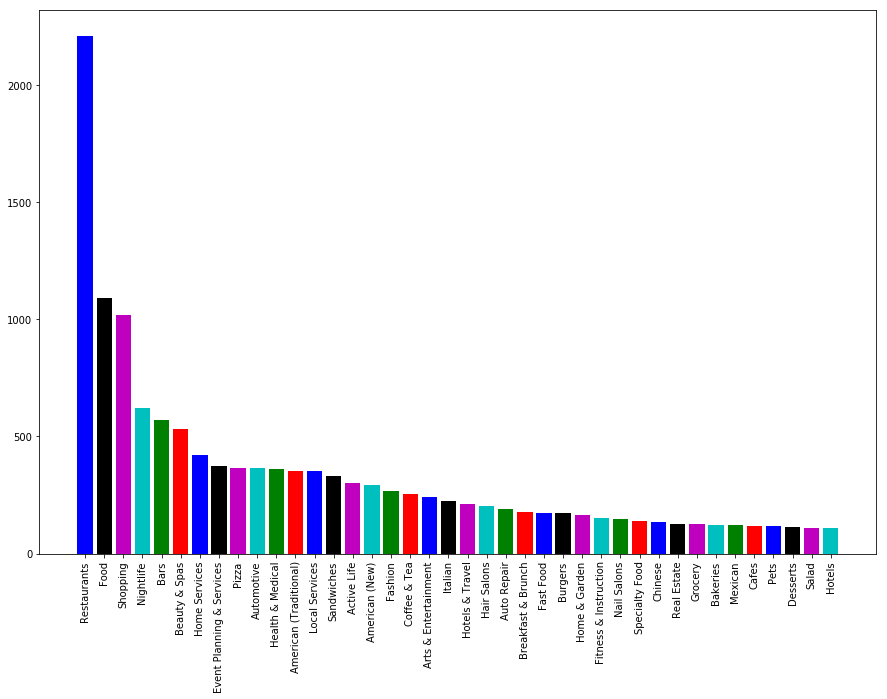

In [73]:
Categories={}
yelp_restaurant_df = business_df['categories']
for x in yelp_restaurant_df:
    all_categories=x
    for cat in all_categories:
        if cat not in Categories:
            Categories[cat]=1
        else:
            Categories[cat]+=1
All_categories=list(Categories.keys())
Cat_list=[[x,Categories[x]] for x in All_categories]

Cat_list=sorted(Cat_list, key=lambda x: x[1], reverse=True)
#LETS find the top 40 Categories of restaurant
Cat_list=Cat_list[:40]
plt.bar(range(len(Cat_list)),[x[1] for x in Cat_list] ,align="center", color="bkmcgr")
plt.xticks(range(len(Cat_list)), [x[0] for x in Cat_list], rotation="vertical")
plt.show()

##  top rated Category along with the least rates Category

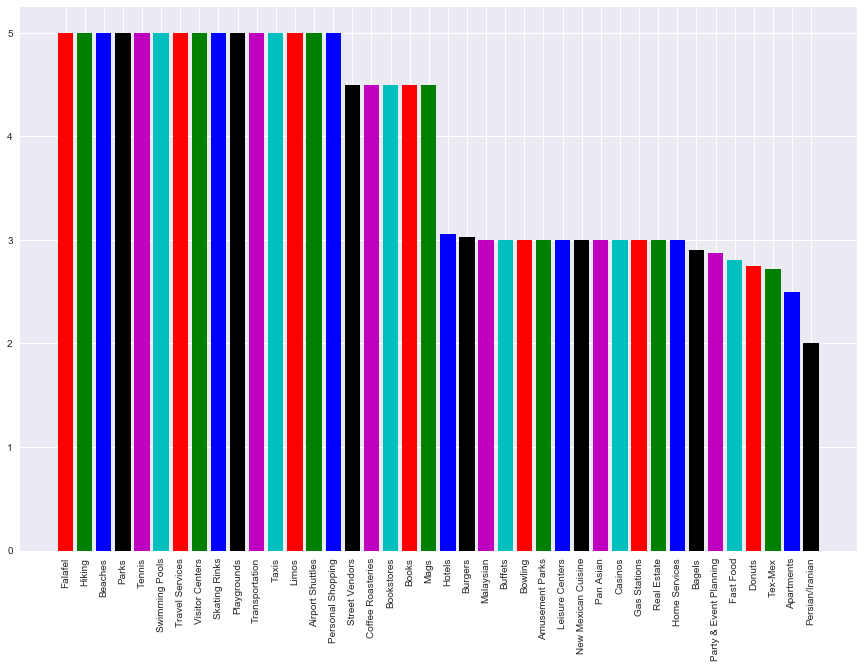

In [26]:
Only_stars=[]
Categories_star={}
yelp_restaurant_df = business_df[business_df['Restaurants'] == 1]
for i,x in yelp_restaurant_df.iterrows():
    all_categories=x['categories']
    Only_stars.append(int(x["stars"]))
    for cat in all_categories:
        if cat not in Categories_star:
            Categories_star[cat]=[]
        Categories_star[cat].append(x["stars"])
Star_list=[]
for x in list(Categories_star.keys()):
    Star_list.append([x, np.mean(Categories_star[x])])
    
Star_list=sorted(Star_list, key=lambda x: x[1], reverse=True)
Star_list=Star_list[:20] + Star_list[len(Star_list)-20:]

plt.bar(range(len(Cat_list)),[x[1] for x in Star_list] ,align="center",color="rgbkmc")
plt.xticks(range(len(Cat_list)), [x[0] for x in Star_list], rotation="vertical")
plt.show()
Only_stars=pd.DataFrame(Only_stars)
Only_stars.columns=["STARS"]

In [78]:
# res_1_neighborhood = res_1_neighborhood[(res_1_neighborhood._id>=8)]
neighborhood = res_1_neighborhood['neighborhood']
res_1_neighborhood_df = business_df[business_df['Restaurants'] == 1].loc[business_df['neighborhood'].isin(neighborhood)]
res_1_neighborhood_df.head(1)

,_id,address,business_id,categories,city,hours,is_open,latitude,longitude,name,...,Wine Bars,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Workers Compensation Law,Wraps,Yelp Events,Yoga,Zoos
0,{'$oid': '5a8c8b75d42e9dd69892c4ef'},104 43rd St,EJFdWX908N8Yc2XG0Lky8A,"(Cafes, Restaurants)",Pittsburgh,"{'Tuesday': '17:00-21:30', 'Friday': '17:00-21...",0,40.472735,-79.963265,River Moon Cafe,...,0,0,0,0,0,0,0,0,0,0


average rating per neighborhood 


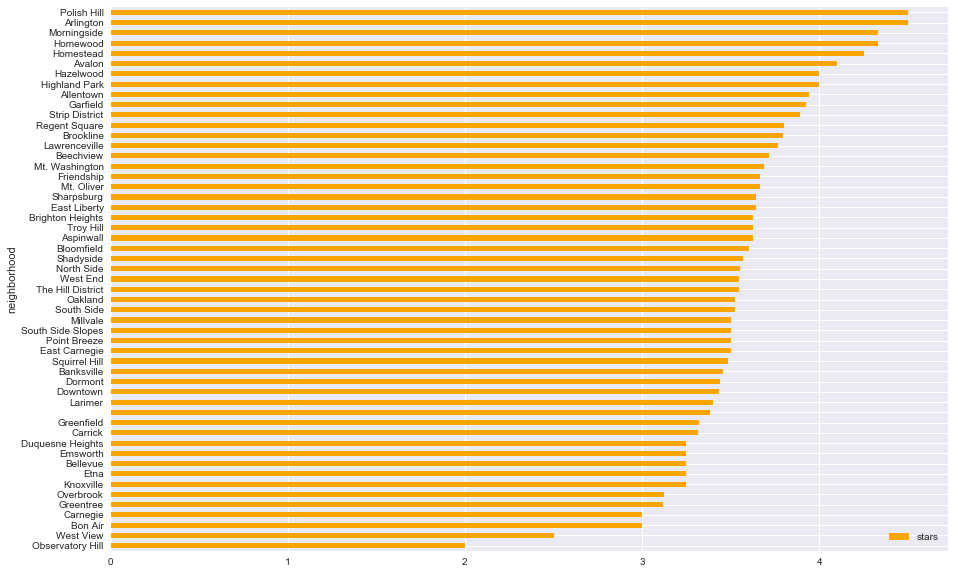

In [79]:
print('average rating per neighborhood ')
res_1_neighborhood_df = res_1_neighborhood_df.pivot_table(index='neighborhood', aggfunc='mean').sort_values(by='stars',ascending=True).reset_index()
plot = res_1_neighborhood_df.plot.barh(x='neighborhood',y='stars',color='orange')

## find nearby Restaurants in map

In [29]:
yelp_restaurant_df = business_df[business_df['Restaurants'] == 1]

In [30]:
# take only name and stars for map hover description
fff = yelp_restaurant_df[['name', 'stars','categories']].astype(str).apply(lambda x: '. Rating: '.join(x), axis=1).tolist()

In [31]:
# mapbox access token. Go to Mapbox.com and sign up and get your access_token. Don't use mine please. 
mapbox_access_token = 'pk.eyJ1IjoiYWxtYXNzbml5YW1hdCIsImEiOiJjamQ3NGY2Zms0emhmMnFuMjJ5OGNvOWoxIn0.DKGZcDRHVFRYNiQBe1D_zw'

# difine our data for ploting on mapbox
data = Data([
    Scattermapbox(
        lat=yelp_restaurant_df.latitude.tolist(),
        lon=yelp_restaurant_df.longitude.tolist(),
        mode='markers',
        # add 'bar' as a marker icon. so it's look beautiful 
        marker=Marker(
            symbol='bar',
            size=9
        ),
        text=fff,
    )
])
# dfine our map layout
layout = Layout(
    # add title
    title='Zoom to your location and find your desire restaurants',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        # add our access token
        accesstoken=mapbox_access_token,
        bearing=0,
        # add center location to our map
        center=dict(
            lat=40.4406248,
            lon=-79.9958864
        ),
        # use style light
        style='light',
        pitch=0,
        # zoom label to 3
        zoom = 15
    ),
)

# let's make the final figure
fig = dict(data=data, layout=layout)
# finally plot the map
py.iplot(fig, filename='Multiple Mapbox')

## top rated restaurant

We take top 20 most occurrences restaurants and calculate their mean of stars review's polarity and plot them and see which is most popular restaurants.